In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch


In [49]:
data = pd.read_csv('./input/penguins_size.csv')
study_data = pd.read_csv('./input/penguins_lter.csv')

In [50]:
data.head(100)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE


In [51]:
data.cov()

C:\Users\Ксения\AppData\Local\Temp\ipykernel_19616\1236454657.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [52]:
data.corr()

C:\Users\Ксения\AppData\Local\Temp\ipykernel_19616\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


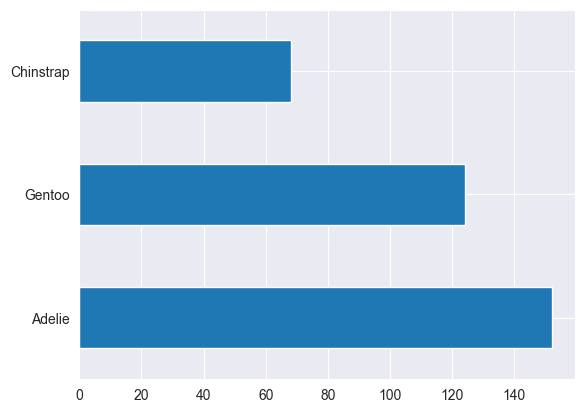

In [53]:
data['species'].value_counts().plot(kind='barh')
plt.show()

In [54]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [135]:
data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [56]:
data['sex'] = data['sex'].fillna('MALE')

In [57]:
data.drop(data[data['sex']=='.'].index, inplace=True)

Body Mass Distribution


C:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


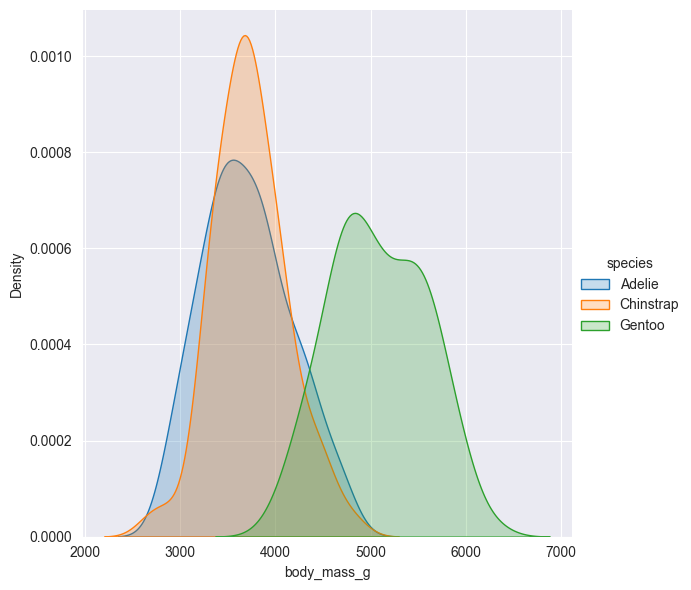

In [58]:
print('Body Mass Distribution')
sns.FacetGrid(data, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

Pairplot


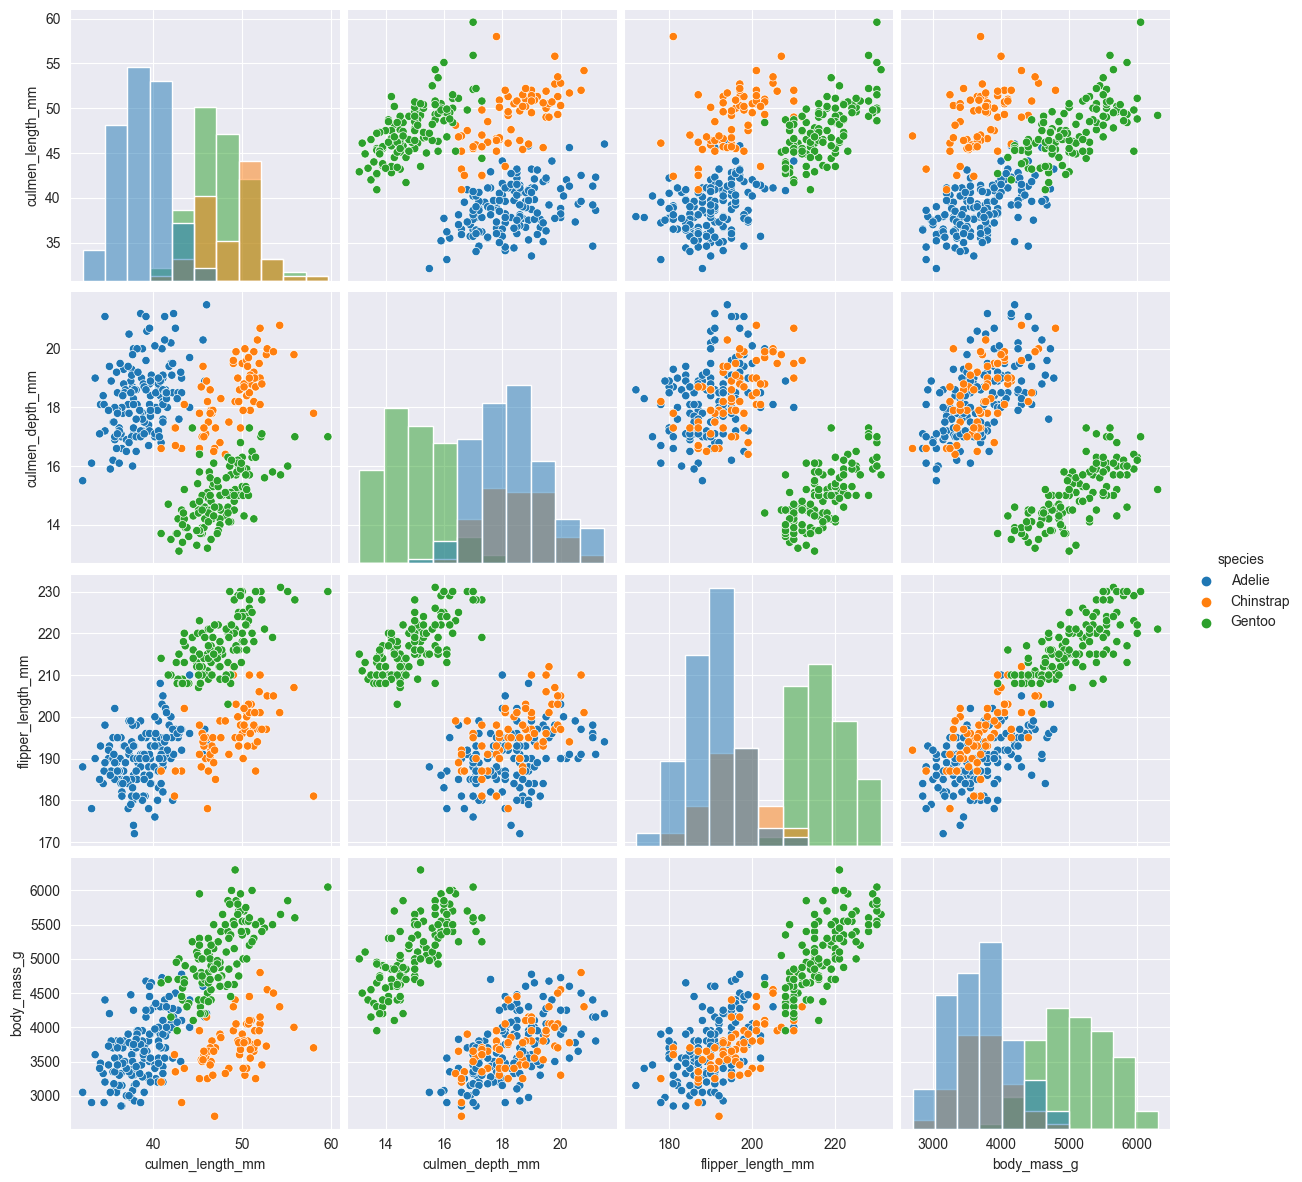

In [59]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

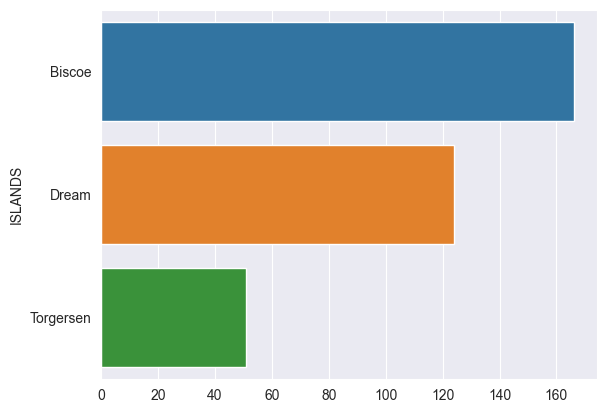

In [60]:

df = data['island'].value_counts().reset_index()

fig = sns.barplot(data=df, x='island', y='index')
fig.set(xlabel='', ylabel='ISLANDS')
plt.show()

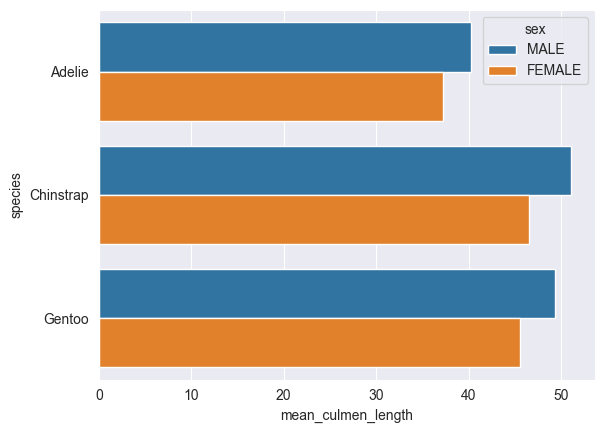

In [61]:

df = data.loc[:,['species','culmen_length_mm','sex']]
df['mean_culmen_length'] = df.groupby(['species','sex'])['culmen_length_mm'].transform('mean')
df = df.drop('culmen_length_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_culmen_length', y='species', hue='sex')
plt.show()

In [62]:
df = data.copy()
target = 'sex'
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

In [63]:
target_mapper = {'MALE':0, 'FEMALE':1}
def target_encode(val):
    return target_mapper[val]

df['sex'] = df['sex'].apply(target_encode)

In [64]:
X = df.drop('sex', axis=1)
y = df['sex']

In [65]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
pred_log = model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_log))

CONFUSION MATRIX
[[29  7]
 [ 1 32]]


In [69]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred_log))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        36
           1       0.82      0.97      0.89        33

    accuracy                           0.88        69
   macro avg       0.89      0.89      0.88        69
weighted avg       0.90      0.88      0.88        69



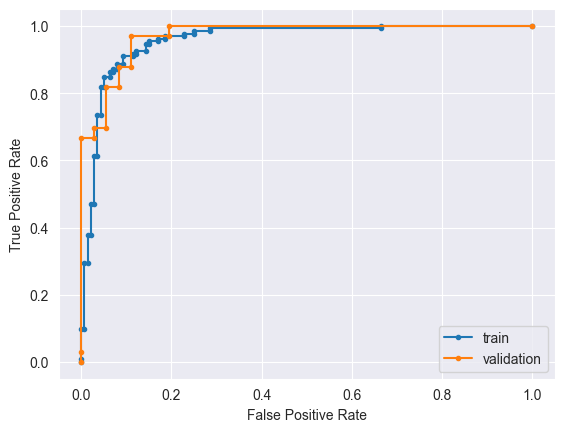

In [70]:
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import accuracy_score

Acc_log= accuracy_score(pred_log,y_test)
print(Acc_log)

0.8840579710144928


In [72]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
pred_RFC = RFC.predict(X_test)

In [73]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_RFC))

CONFUSION MATRIX
[[30  6]
 [ 0 33]]


In [74]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred_RFC))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.85      1.00      0.92        33

    accuracy                           0.91        69
   macro avg       0.92      0.92      0.91        69
weighted avg       0.93      0.91      0.91        69



In [75]:
Acc_RFC= accuracy_score(pred_RFC,y_test)
print(Acc_RFC)

0.9130434782608695


In [76]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred_DTR = DTR.predict(X_test)

In [77]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_DTR))

CONFUSION MATRIX
[[24 12]
 [ 4 29]]


In [78]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred_DTR))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        36
           1       0.71      0.88      0.78        33

    accuracy                           0.77        69
   macro avg       0.78      0.77      0.77        69
weighted avg       0.79      0.77      0.77        69



In [79]:
Acc_DTR= accuracy_score(pred_DTR,y_test)
print(Acc_DTR)

0.7681159420289855


In [80]:
from sklearn.neighbors import KNeighborsClassifier
Kn = KNeighborsClassifier(n_neighbors= 9, leaf_size = 20)
Kn.fit(X_train,y_train)
pred_Kn = Kn.predict(X_test)

In [81]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_Kn))

CONFUSION MATRIX
[[30  6]
 [ 0 33]]


In [82]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred_Kn))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.85      1.00      0.92        33

    accuracy                           0.91        69
   macro avg       0.92      0.92      0.91        69
weighted avg       0.93      0.91      0.91        69



In [83]:
Acc_Kn= accuracy_score(pred_Kn,y_test)
print(Acc_Kn)

0.9130434782608695


In [84]:
models = pd.DataFrame({"Model":['Logistic','Random Forest','Decision Tree','KNeighbours'],
           "Accuracy":[Acc_log,Acc_RFC,Acc_DTR,Acc_Kn]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,0.913043
3,KNeighbours,0.913043
0,Logistic,0.884058
2,Decision Tree,0.768116


In [112]:
df = data.copy()
results = pd.DataFrame()
Name = []
Score = []

CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


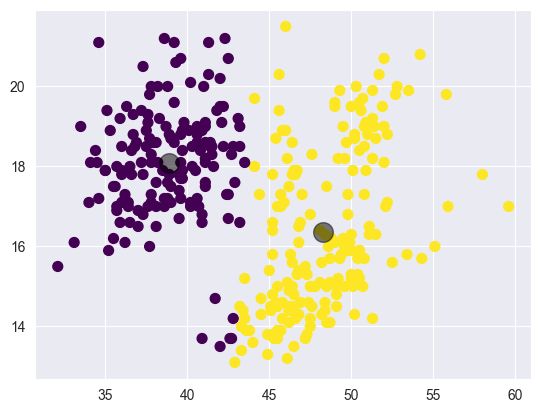

In [122]:

from sklearn.metrics import silhouette_score

print('CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH')
X = df[['culmen_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


In [123]:
score = silhouette_score(X, kmeans.labels_)
print(score)
Score.append(score)
Name.append('KMeans')

0.574997903120266


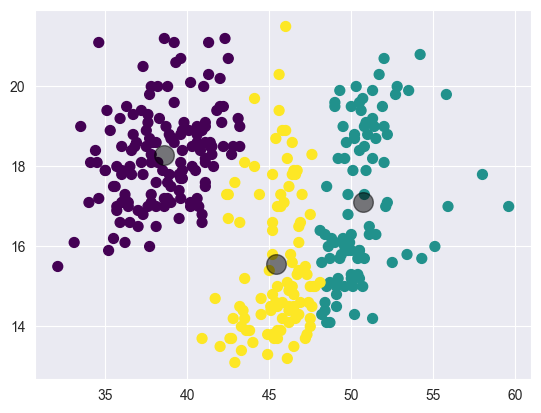

In [132]:
BCH = Birch(branching_factor=17)
BCH.fit(X)
y_BCH = BCH.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_BCH, s=50, cmap='viridis')

unique_labels = np.unique(y_BCH)
centers = []

for label in unique_labels:
    cluster_samples = X[y_BCH == label]
    cluster_center = cluster_samples.mean(axis=0)
    centers.append(cluster_center)

centers = np.array(centers)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [133]:
score = silhouette_score(X, BCH.labels_)
print(f"Silhouette score: {score:0.3f}")
Score.append(score)
Name.append('Birch')

Silhouette score: 0.479


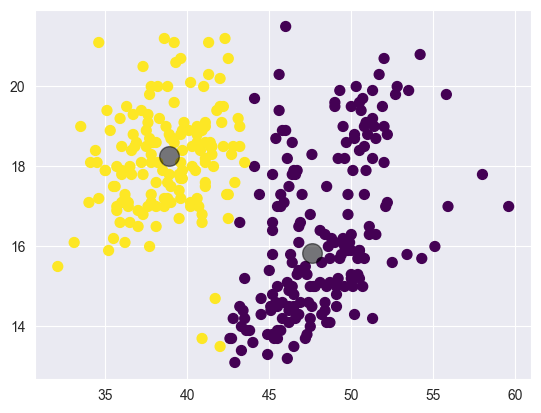

In [117]:
MS = MeanShift()
MS.fit(X)
y_MS = MS.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_MS, s=50, cmap='viridis')

centers = MS.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


In [118]:
score = silhouette_score(X, MS.labels_)
print(f"Silhouette score: {score:0.3f}")
Score.append(score)
Name.append('MeanShift')

Silhouette score: 0.576


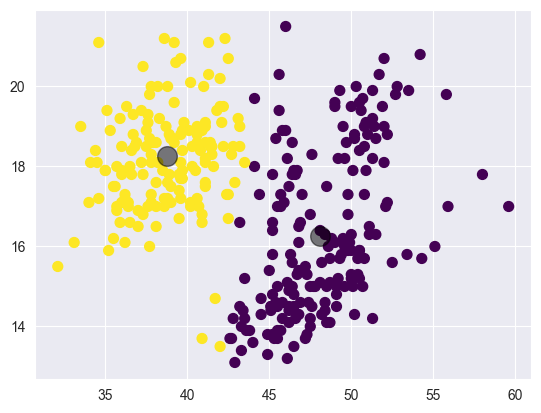

In [119]:
Aggl = AgglomerativeClustering(n_clusters=2)
Aggl.fit(X)
y_Aggl = Aggl.fit_predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_MS, s=50, cmap='viridis')

unique_labels = np.unique(y_Aggl)
centers = []

for label in unique_labels:
    cluster_samples = X[y_Aggl == label]
    cluster_center = cluster_samples.mean(axis=0)
    centers.append(cluster_center)

centers = np.array(centers)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [120]:
score = silhouette_score(X, Aggl.labels_)
print(f"Silhouette score: {score:0.3f}")
Score.append(score)
Name.append('AgglomerativeClustering')

Silhouette score: 0.573


In [121]:
results['Name'] = Name
results['Score'] = Score
results

,Name,Score
0,KMeans,0.487258
1,Birch,0.363764
2,MeanShift,0.576382
3,AgglomerativeClustering,0.572930
